<a href="https://colab.research.google.com/github/Rahul-Singh-10/Sales-Forecasting-Walmart-Case-Study/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Wrangling/Cleaning 
1.1 : Imports
Import needed libarires 
Import data from drive and investigate highelevel 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2: Data import
import all need data, data cleaning and joining for 1 single level data.

In [2]:
features = pd.read_csv('/content/drive/MyDrive/walmart-recruiting-store-sales-forecasting/features.csv.zip')
stores = pd.read_csv('/content/drive/MyDrive/walmart-recruiting-store-sales-forecasting/stores.csv')
train = pd.read_csv('/content/drive/MyDrive/walmart-recruiting-store-sales-forecasting/train.csv.zip')
sample = pd.read_csv('/content/drive/MyDrive/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

**1.2.1: Stores dataset**: 
figure out any missing values, baselevel data understanding and required data cleaning


In [3]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
stores.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

**1.2.2: Features dataset**: 
figure out any missing values, baselevel data understanding and required data cleaning

In [6]:
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
features.Date = features.Date.astype('datetime64')

In [8]:
features.MarkDown1.value_counts()

460.73     2
150.46     2
175.64     2
8.62       2
1.50       2
          ..
4599.86    1
3679.59    1
2569.12    1
312.11     1
212.02     1
Name: MarkDown1, Length: 4023, dtype: int64

**1.2.2: Train dataset**: 
figure out any missing values, baselevel data understanding and required data cleaning

In [9]:
train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
train.Date = train.Date.astype('datetime64')

**1.2.3: Merge all dataset**: 
merging all dataset on one common filed(this will be an inner join)

In [12]:
temp = train.merge(features, on =['Store','Date','IsHoliday'],how ='inner')

In [13]:
df = temp.merge(stores, on = ['Store'],how='inner')

In [14]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [15]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [16]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [17]:
df.loc[df.MarkDown1.isnull() ,'MarkDown1']= 0
df.loc[df.MarkDown2.isnull() ,'MarkDown2']= 0
df.loc[df.MarkDown3.isnull() ,'MarkDown3']= 0
df.loc[df.MarkDown4.isnull() ,'MarkDown4']= 0
df.loc[df.MarkDown5.isnull() ,'MarkDown5']= 0

### Exploratory Data Analysis

In [18]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
def paron(x):
    if x == False:
        return 0
    return 1
df.IsHoliday = df.IsHoliday.map(paron)
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,week
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5


In [20]:
df.Store.unique()
## There are 45 unique stores being investigated

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [21]:
df.Temperature.unique()

array([42.31, 38.51, 39.93, ..., 75.87, 77.55, 74.09])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weekly sales distribution when grouped by dates ')

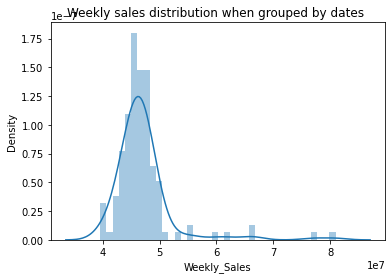

In [22]:
sns.distplot(df.groupby(['Date'])['Weekly_Sales'].sum())
sns.set(rc={'figure.figsize':(15.7,6.27)})
plt.title('Weekly sales distribution when grouped by dates ')

Text(0, 0.5, 'Weekly sales ')

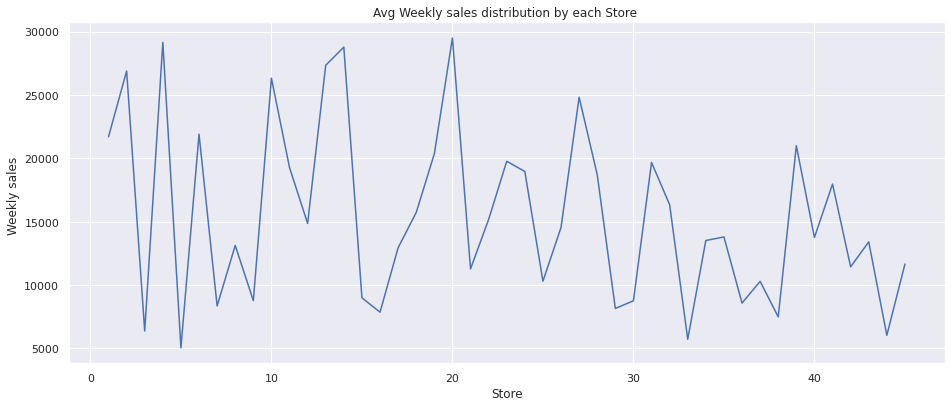

In [23]:
df.groupby(['Store'])['Weekly_Sales'].mean().plot()
plt.title('Avg Weekly sales distribution by each Store ')
plt.ylabel('Weekly sales ')

In [24]:
df['week_year'] = df.Date.dt.strftime('%Y-w%U')

In [25]:
#Top 5
df.groupby('Store').Weekly_Sales.mean().sort_values().index[-5:]
#bottom5
df.groupby('Store').Weekly_Sales.mean().sort_values().index[:5]

Int64Index([5, 33, 44, 3, 38], dtype='int64', name='Store')

In [26]:
## Store subset
week_sales = df.groupby(['Store','week_year'],as_index=False).Weekly_Sales.mean()

##Store+Department Subset
dept_week_sales = df.groupby(['Store','Dept','week_year'],as_index=False).Weekly_Sales.mean()

In [27]:
#top/wort performing store week_year based
bottom_stores = week_sales[week_sales.Store.isin([5, 33, 44, 3, 38])]
top_stores = week_sales[week_sales.Store.isin([2, 13, 14, 4, 20])]

#top/wort performing dept week_year based
bottom_storesd = dept_week_sales[dept_week_sales.Store.isin([5, 33, 44, 3, 38])]
top_storesd = dept_week_sales[dept_week_sales.Store.isin([2, 13, 14, 4, 20])]

In [28]:
# Plot the Avg weekly Sales by bottom 5 stores
import plotly.express as px

fig = px.line(bottom_stores, x='week_year', y=['Weekly_Sales'], title='Avg Weekly sales by Low performing store',color='Store')
fig.update_xaxes(rangeslider_visible=True)

fig.show()

As seen in figure, there weekly sales changes over the year.
*   There is no apparent trend in the data over this period. As years progress, weekly sales for low performing stories neither increase or decrease overall but they are small amount within a range.. 
*  There is a trend of sales gradually increasing as we get to end of hte year holidays were majority of revenue is incoming for the year



In [29]:
# Plot the Avg weekly Sales by top 5 stores
import plotly.express as px

fig = px.line(top_stores, x='week_year', y=['Weekly_Sales'], title='Avg Weekly sales by High performing store',color='Store')
fig.update_xaxes(rangeslider_visible=True)

fig.show()

As seen in figure, there weekly sales changes over the year for high performing stores.
*  There is a trend of sales gradually increasing as we get to end of hte year holidays were majority of revenue is incoming for the year.
* We can see suden spikes showing sales flucating during the occasionally us holidays and by end of 2012 there is a decline in our sales.


In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



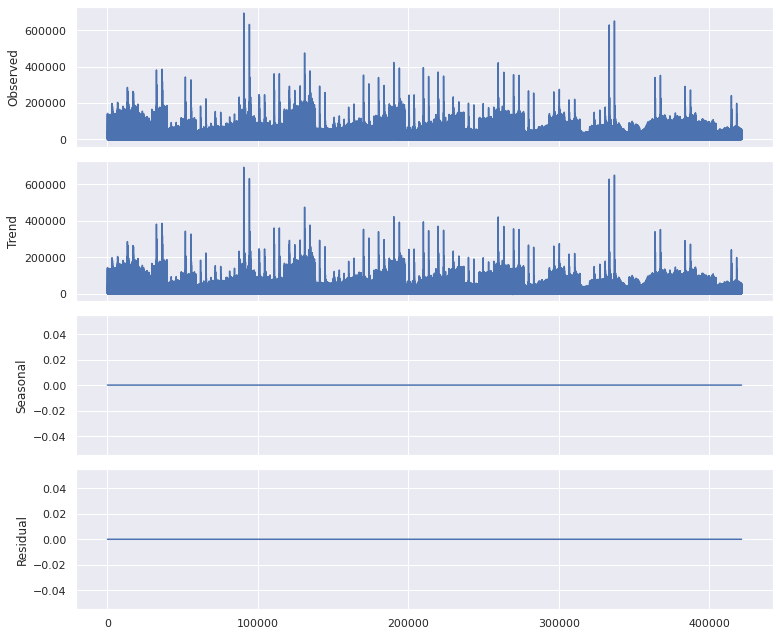

In [31]:
#Time series decomposition

from pylab import rcParams
rcParams['figure.figsize'] = 11,9
decomposition = sm.tsa.seasonal_decompose(df['Weekly_Sales'],model='additive',freq=1)
fig = decomposition.plot()
plt.show()


**DIFFERENT TYPES OF STORES**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of Stores ')

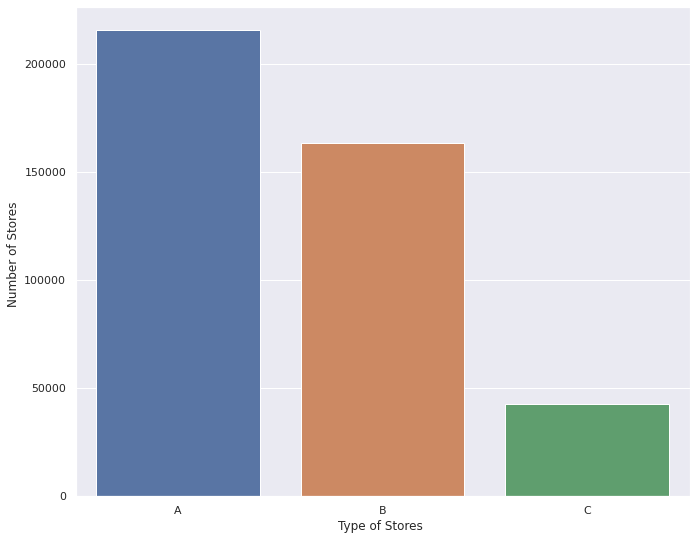

In [32]:
#Store Types
Store_type = df.Type.unique()
Numberofstores = df.Type.value_counts()
sns.barplot(Store_type,Numberofstores)
plt.xlabel('Type of Stores ')
plt.ylabel('Number of Stores ')

In [33]:
df.Type.value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

**Insights:**
C type stores are the lowest count, we can see that it is 20% of A type stores.
B type stores are in the middle, its 76% of A type stores.

**SIZES OF STORES**

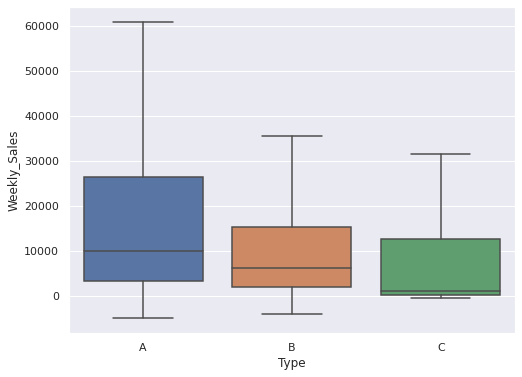

In [34]:
#different size of stores
store_sale_size = df[['Type','Weekly_Sales']]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale_size,showfliers = False)

**Insights:** A type stores havea highersales compared to B and C but we also see soe returns in A/B store




**HOLIDAY SALE**

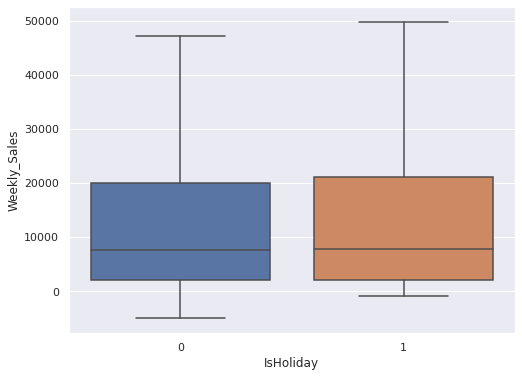

In [35]:
holiday_sale = df[['IsHoliday','Weekly_Sales']]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=holiday_sale, showfliers=False)

**Insights:** Pverall stand point we see holiday has minial effect on sales, When ther is a holiday we see higher sales compare to non holiday.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



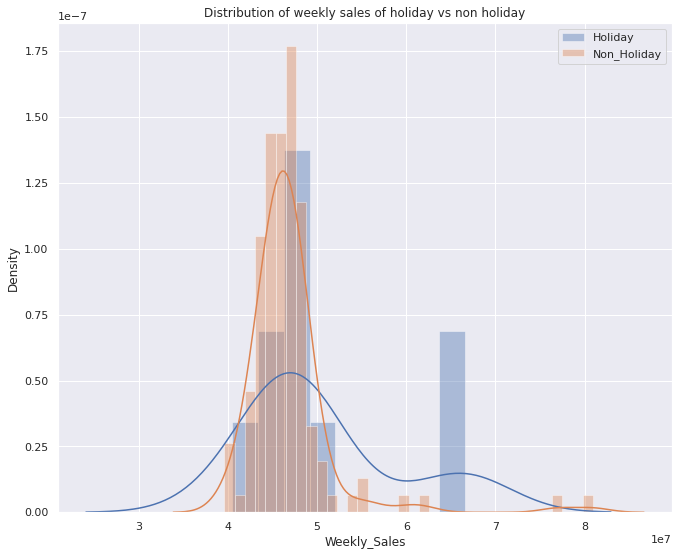

In [36]:
temp=df.groupby(['Date','IsHoliday'])['Weekly_Sales'].sum().reset_index()
Holiday=temp[temp['IsHoliday']==True]
Non_Holiday=temp[temp['IsHoliday']==False]
sns.distplot(Holiday['Weekly_Sales'],label='Holiday')
sns.distplot(Non_Holiday['Weekly_Sales'],label='Non_Holiday')
sns.set(rc={'figure.figsize':(12,6)})
plt.legend()
plt.title('Distribution of weekly sales of holiday vs non holiday')
plt.show()

**UNEMPLOYMENT RATE**

<Figure size 1080x864 with 0 Axes>

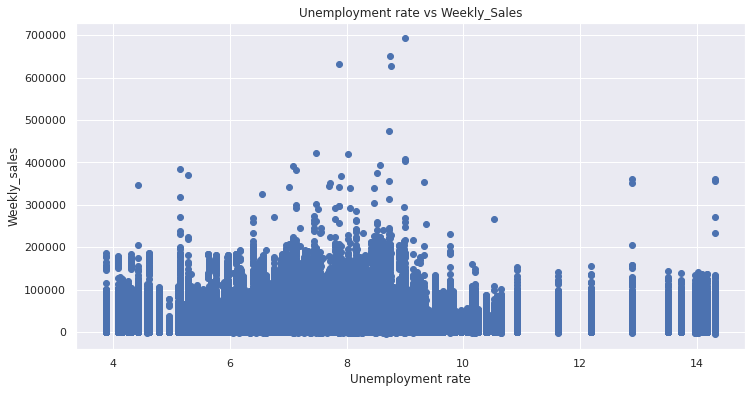

<Figure size 1080x864 with 0 Axes>

In [37]:
#unemployment rate based on sales
plt.scatter(df.Unemployment,df.Weekly_Sales)
plt.title('Unemployment rate vs Weekly_Sales')
plt.xlabel('Unemployment rate')
plt.ylabel('Weekly_sales')
plt.figure(figsize = (15,12))

**Insights**: There seems to be no correlation between weekly_sales and unemployment rate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



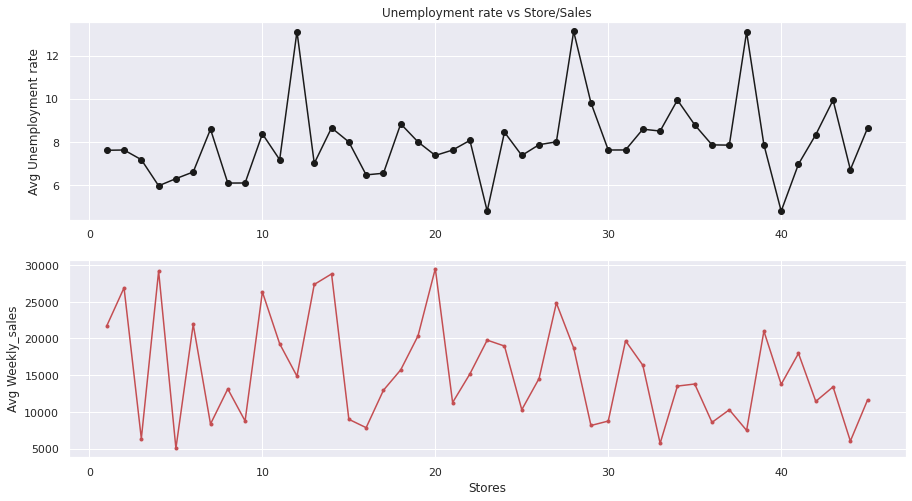

In [38]:
#unemployment rate based on sales
emp = df.groupby('Store',as_index=False)['Unemployment','Weekly_Sales'].mean()

plt.figure(figsize = (15,8))

plt.subplot(2, 1, 1)
plt.plot(emp.Store,emp.Unemployment,'ko-')
plt.title('Unemployment rate vs Store/Sales')
plt.ylabel('Avg Unemployment rate')


plt.subplot(2, 1, 2)
plt.plot(emp.Store, emp.Weekly_Sales, 'r.-')
plt.xlabel('Stores')
plt.ylabel('Avg Weekly_sales')

plt.show()

**Insights:** No visual correlation between unemployment rate and sales

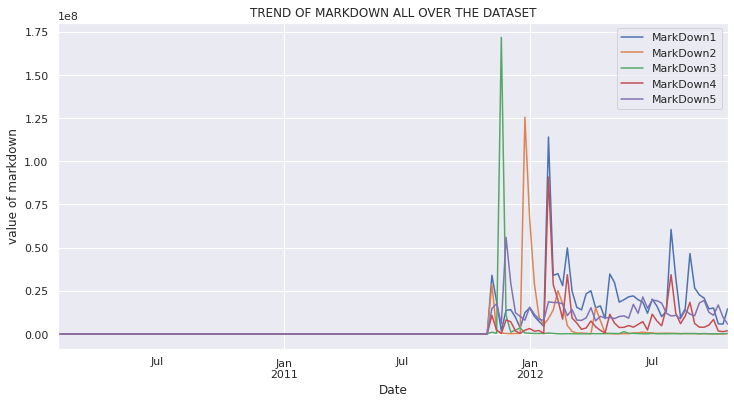

In [39]:
df.groupby(['Date'])['MarkDown1'].sum().plot(label='MarkDown1')
df.groupby(['Date'])['MarkDown2'].sum().plot(label='MarkDown2')
df.groupby(['Date'])['MarkDown3'].sum().plot(label='MarkDown3')
df.groupby(['Date'])['MarkDown4'].sum().plot(label='MarkDown4')
df.groupby(['Date'])['MarkDown5'].sum().plot(label='MarkDown5')
plt.title('TREND OF MARKDOWN ALL OVER THE DATASET')
plt.ylabel('value of markdown')
plt.legend()

**Insights:** Markdown on products started late 2011. M3 there was a huge spike of that product during peak holiday season. There is a constient product markdown for M1,M4 & M5.


**FUEL PRICE**

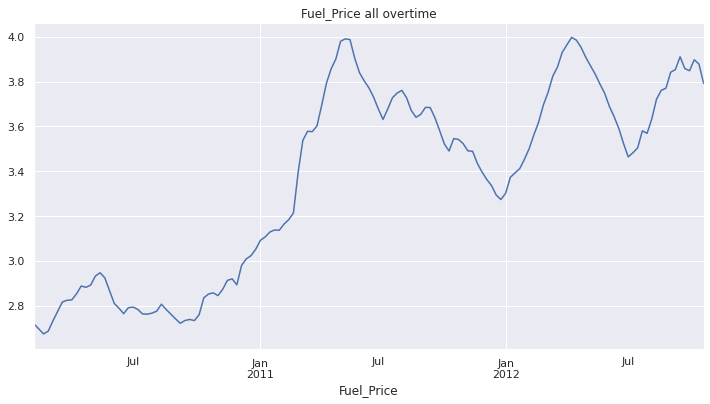

In [40]:
#fuel price
df[['Date','Fuel_Price']].groupby(['Date'])['Fuel_Price'].agg('mean').plot(color='b')
plt.title('Fuel_Price all overtime')
plt.xlabel('Fuel_Price')
sns.set(rc={'figure.figsize':(15,7)})


Text(0, 0.5, 'weekly sales')

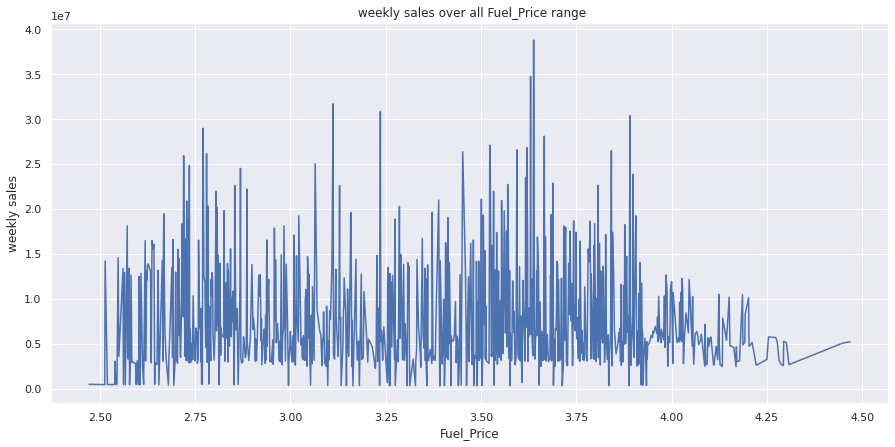

In [41]:
df[['Fuel_Price','Weekly_Sales']].groupby(['Fuel_Price'])['Weekly_Sales'].sum().plot()
plt.title(' weekly sales over all Fuel_Price range')
plt.ylabel('weekly sales')

**Insights:**
As the fuel prices spike over a nomial 3.75 average per gallon, we see a decline in the weekly_sales range.

**TEMPERATURE**

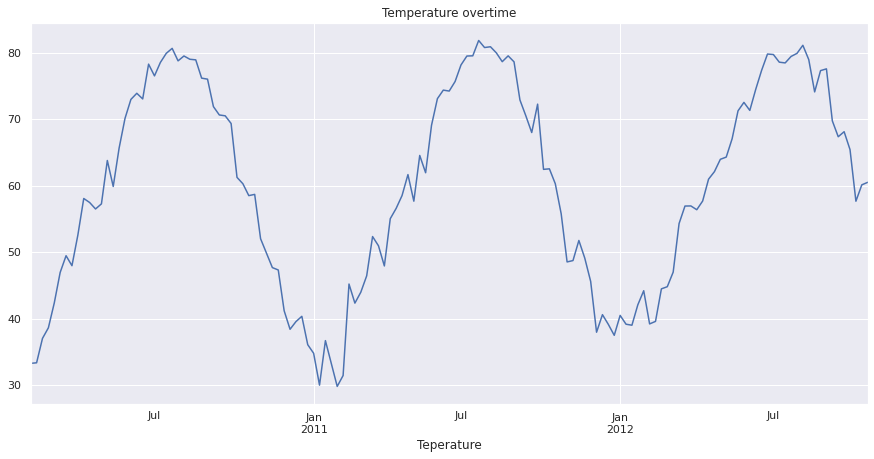

In [42]:
#temperature
df.groupby(['Date'])['Temperature'].mean().plot(color='b')
plt.title('Temperature overtime')
plt.xlabel('Teperature')
sns.set(rc={'figure.figsize':(15,6)})

Text(0, 0.5, 'weekly sales')

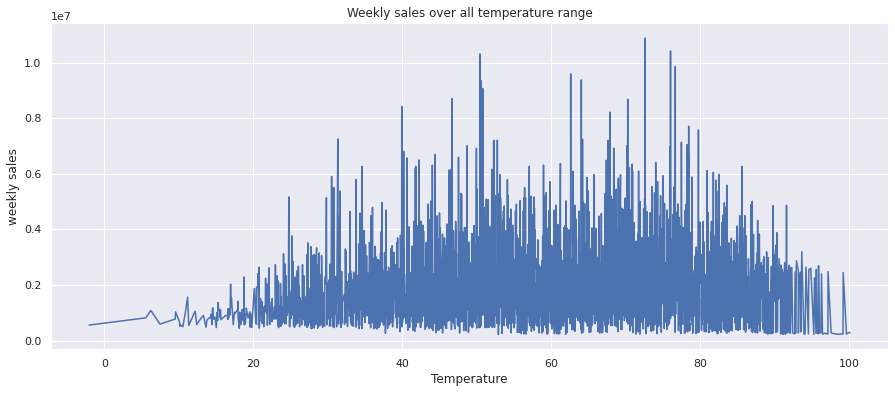

In [43]:
df.groupby(['Temperature'])['Weekly_Sales'].sum().plot()
plt.title('Weekly sales over all temperature range')
plt.ylabel('weekly sales')

**Insights:**
Temperature and weekly_sales have a inverse relationship. A nomial pleasant temperature of 50-75 bulk of the high sales occur, as we get either hotter or colder sales diminsh. Each region in US has different temp and that would dictate sales.

In [44]:
#monthly decomp

# Descriptive statistics
table_m = pd.pivot_table(data=df, 
                        index=['month'], 
                        values='Weekly_Sales',
                        aggfunc=['mean', 'max', 'min', 'std'])

table_m.columns = table_m.columns.droplevel(1)

table_m['months'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set index 
table_m = table_m.set_index('months')

table_m.T

months,January,February,March,April,May,June,July,August,September,October,November,December
mean,14126.075111,16008.779217,15416.657597,15650.338357,15776.337202,16326.137002,15861.419650,16062.516933,15095.886154,15243.855576,17491.031424,19355.702141
max,206871.520000,293966.050000,214383.070000,224917.940000,206160.360000,206575.900000,198349.170000,241120.000000,214448.960000,221834.280000,693099.360000,406988.630000
min,-400.000000,-1750.000000,-1699.000000,-698.000000,-548.000000,-594.000000,-1098.000000,-798.000000,-3924.000000,-4988.940000,-1098.000000,-798.000000
std,21220.754522,22925.935446,21646.065918,21625.703256,21626.685866,22082.802440,21704.257869,22155.079986,21439.256090,21334.079444,28461.626189,27729.816839


[Text(0, 0.5, 'Weekly_Sales'), Text(0.5, 0, 'Months')]

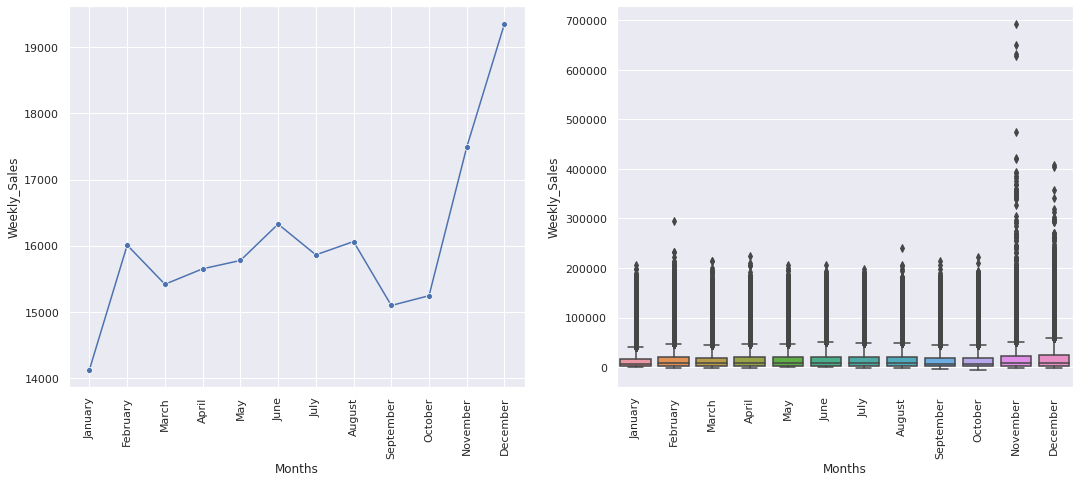

In [45]:
# line and box plot for sales according to months
f, ax = plt.subplots(1, 2, figsize=(18, 7))
sns.lineplot(x = table_m.index , y= 'mean' , data=table_m, ax=ax[0], marker='o')
sns.boxplot(x='month', y='Weekly_Sales', data=df, ax=ax[1])
ax[0].set_xticklabels(table_m.index, rotation=90)
ax[1].set_xticklabels(table_m.index, rotation=90) 
ax[0].set(xlabel='Months', ylabel='Weekly_Sales')
ax[1].set(xlabel='Months', ylabel='Weekly_Sales')

As shown in lineplot
* as expected major us holidays are showing high sales in product which aligns with data and our expectations.
* Month have Jan having lowest record as it coming of last year major high.
* Sales are 3x in end of the year compare to the start of year.

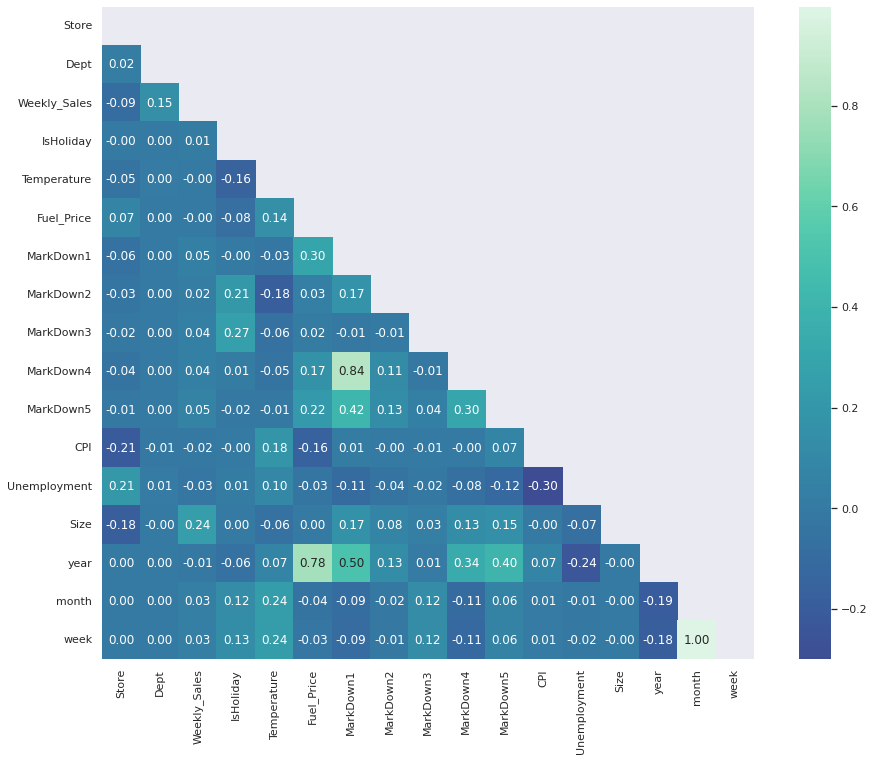

In [46]:
corr = df.corr()
# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap='mako')

plt.show();

In [47]:
df['Date'] = pd.to_datetime(df['Date'])

In [48]:
df.set_index('Date', inplace = True)

**Insights: Correlation Matirx**

**Weekly Sale**

Top Positive Correlation
1. Size
2. Dept
3. Markdown 1/5

Top Negative Correlation
1. Unemployment
2. Temperature
3. Year

 **Stationary**: means that the joint distribution of the observations doesn't depend on time. If a data set is not stationary, then it becomes difficult to model. Modeling involves estimating a set of parameters, and if a process is not stationary, and the parameters are different at each point in time, then there are too many parameters to estimate. There two ways of checking stationary. The *Rolling Statistic Test* gives the pictorial representation while the *Dickey-Fuller Test* gives some values which help to determine whether data is stationary or not.

In [49]:
#grouped walmart sales data by weeks

df2 = pd.DataFrame(df.reset_index().groupby('Date')['Weekly_Sales'].sum()).reset_index()

In [50]:
df2.Date = pd.to_datetime(df2.Date)
df2.dtypes

Date            datetime64[ns]
Weekly_Sales           float64
dtype: object

In [51]:
# Determining rolling statistics
rollmean = df2.Weekly_Sales.rolling(window=12).mean()
rollstd = df2.Weekly_Sales.rolling(window=12).std()

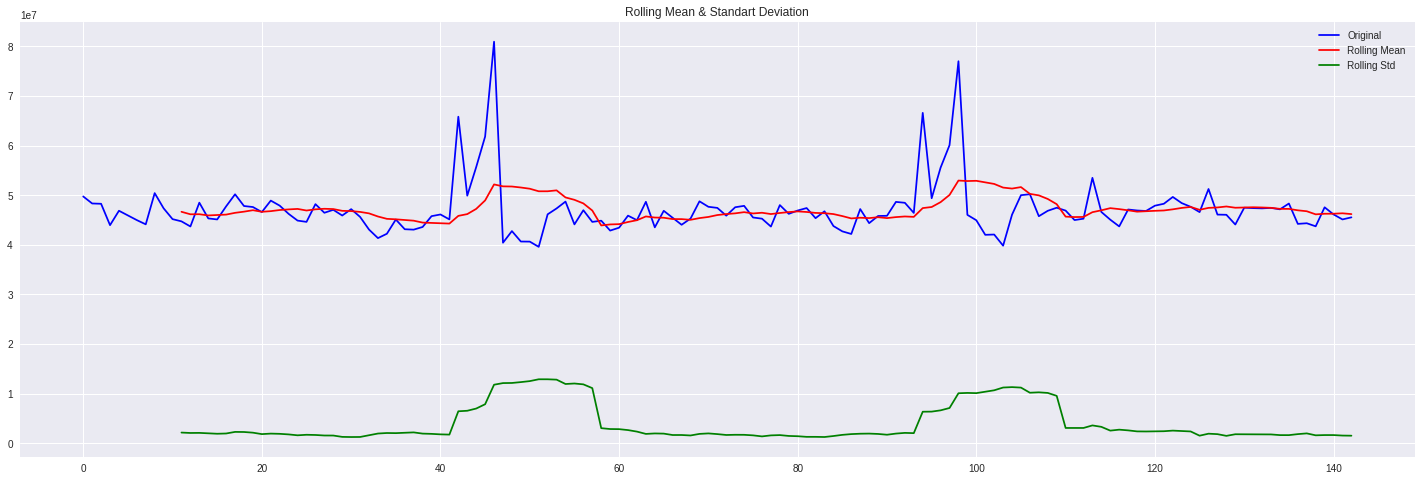

In [52]:
# Plot rolling statistics
plt.style.use('seaborn')
plt.figure(figsize=(25,8))
orig = plt.plot(df2.Weekly_Sales, color = 'blue', label='Original')
mean = plt.plot(rollmean, color = 'red', label='Rolling Mean')
std = plt.plot(rollstd, color = 'green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standart Deviation')
plt.show(block=False)

Hypothesis Testing on times series

In [53]:
#testing for stationarity
# Perform Dickey - Fuller test for weekly sales data
#H0: It is non stationary
#H1: It is stationary

from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test')


def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observerations used']
  for value,label in zip(result,labels):
    print(label+':'+str(value))
  if result[1] <= 0.05:
    print("Time seris : It is stationary ")
  else:
    print("Times series : It is non stationary")


Results of Dickey-Fuller Test


In [54]:
adfuller_test(df2['Weekly_Sales'])

ADF Test Statistic:-5.908297957186334
p-value:2.675979158986027e-07
#Lags Used:4
Number of Observerations used:138
Time seris : It is stationary 


H0: indicated time series to be non-stationary.
H1: Time series is stationary.

Given the p-value to be less than 0.05 , we can **reject** null hypothesis and state that time series is stationary.

t-x are consider lags; which determine how many days bag user needs to go to predict sales on x date

##AutoCorrelation and Partials
the correlation of a single time series with a lagged copy of itself. These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.
pacf removes the effect of previous time points

Steps:
1. indentify an AR model with PACF
2. p = Ar model lags; d = differencing, q = MA lags

In [55]:
#train/test split
df2train = df2[df2['Date']<'2012-01-01']
df2test = df2[df2['Date']>='2012-01-01']
#df2train.plot()
#df2test.plot()
#plt.show()

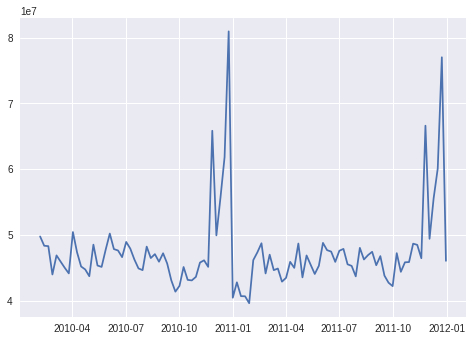

In [56]:
plt.plot(df2train.Date,df2train.Weekly_Sales)

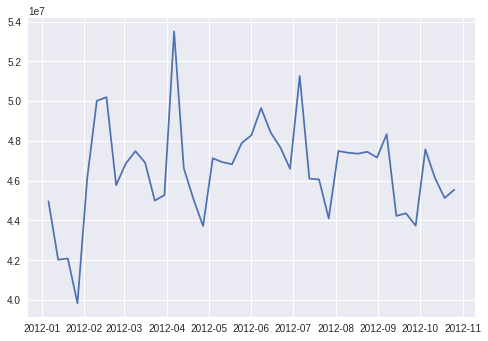

In [57]:
plt.plot(df2test.Date,df2test.Weekly_Sales)

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

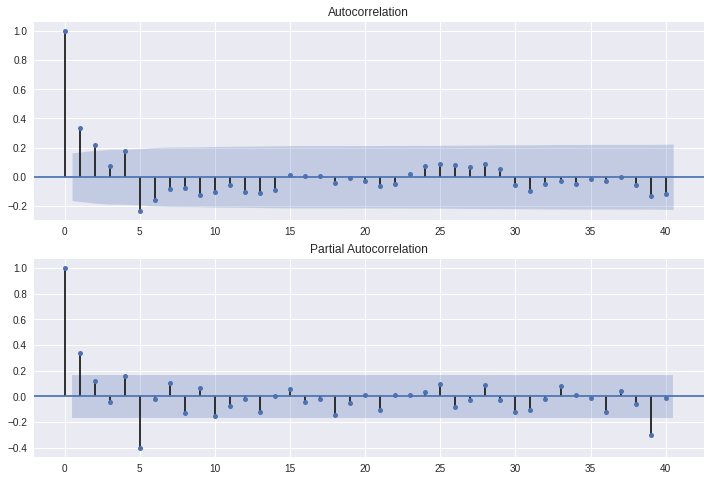

In [59]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['Weekly_Sales'],lags =40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['Weekly_Sales'],lags=40,ax=ax2)

* p value = 1 #shut off of pcaf starts at keeping all lags within same bandwith
* q value = 2
* d value =  0; data is stationary and doesnt require differincing

#ARIMA MODEL 

In [60]:
from statsmodels.tsa.arima_model import ARIMA

In [193]:
#training the model

model = ARIMA(df2train['Weekly_Sales'],order = (1,0,2)) #pdq
model_fit = model.fit()

In [194]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                     ARMA(1, 2)   Log Likelihood               -1699.483
Method:                       css-mle   S.D. of innovations        5808155.729
Date:                Thu, 11 Aug 2022   AIC                           3408.966
Time:                        04:42:18   BIC                           3421.992
Sample:                             0   HQIC                          3414.238
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.737e+07   1.16e+06     40.732      0.000    4.51e+07    4.97e+07
ar.L1.Weekly_Sales     0.6733      0.165      4.089      0.000       0.351       0.996
ma.L1.Weekly_Sales  

In [63]:
#testing the model on last 9 months

model = ARIMA(df2test['Weekly_Sales'],order = (1,1,1)) #pdq
model_fit = model.fit()
mean_forecast = model_fit.forecast(steps=43)[0]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [64]:
df2test.Weekly_Sales.values.sum()

2000132859.35

In [65]:
mean_forecast.sum()

2024873492.8607666

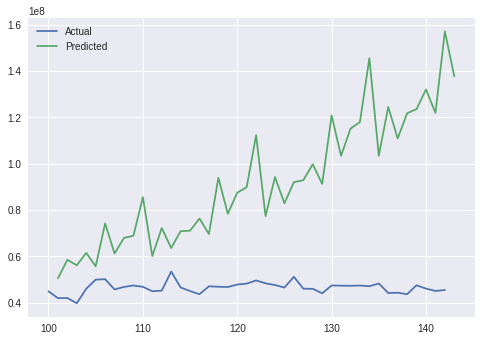

In [195]:
from matplotlib import pyplot

pyplot.plot(df2test['Weekly_Sales'], label='Actual')
pyplot.plot(mean_forecast, label='Predicted')
pyplot.legend()
pyplot.show()

## Cross Validation
run a manual cross validation of each pdq values with the model to verify and hyptertuned the model

In [67]:
import pandas as pd

table = pd.DataFrame()

In [ ]:
insert_index = 0
insert_index1 = 1
insert_index2 = 2
insert_colname = 'p'
insert_colname1 = 'd'
insert_colname2 = 'q'
insert_values = [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6]
insert_values1 = [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6]
insert_values2 = [1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6]
table.insert(loc=insert_index, column=insert_colname, value=insert_values)
table.insert(loc=insert_index1,column=insert_colname1,value=insert_values1)
table.insert(loc=insert_index2,column=insert_colname2,value=insert_values2)

In [ ]:
for i,j,k in table.to_numpy():
  model = ARIMA(df2test['Weekly_Sales'],order = (i,j,k)) #pdq
  model_fit = model.fit()
  mean_forecast = model_fit.forecast(steps=43)[0]
  table.MA = table.append([mean_forecast.sum() - df2test.Weekly_Sales.values.sum()])
  table.MAPE = table.append([(b / df2test.Weekly_Sales.values.sum())*100 for b in table.MA.values])

##Another attempt on cross valdiation using a seasonal arima model

In [70]:
import itertools
p = d = q = range(0,2)

pdq=list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [71]:
import warnings
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(df2train.Weekly_Sales, # change this train
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit() 

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{} x {}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 1) x (0, 1, 1, 12)12 model - AIC:3015.912095723656


In [72]:
param = (0,1,1)

temp_model = sm.tsa.statespace.SARIMAX(df2train.Weekly_Sales, # change this train
                                             order = param,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)

temp_moodel_fit = temp_model.fit()

In [73]:
mean_forecast = temp_moodel_fit.get_prediction(start=101,end=143,dynamic=False).predicted_mean
mean_forecast[:5]

101    5.679545e+07
102    5.679545e+07
103    5.679545e+07
104    5.679545e+07
105    5.679545e+07
dtype: float64

In [74]:
df2test_copy = df2test
df2test_copy['forecast'] = mean_forecast.values
df2test_copy.head()

,Date,Weekly_Sales,forecast
100,2012-01-06,44955421.95,5.679545e+07
101,2012-01-13,42023078.48,5.679545e+07
102,2012-01-20,42080996.56,5.679545e+07
103,2012-01-27,39834974.67,5.679545e+07
104,2012-02-03,46085608.09,5.679545e+07


In [75]:
def calc_mape(actuals, forecasts):
  aperror = abs(actuals-forecasts)/actuals
  return aperror.mean()

In [76]:
calc_mape(df2test_copy['Weekly_Sales'], df2test_copy['forecast'])

0.22440022159866513

In [120]:
import itertools
p = d = q = range(0,3)

pdq=list(itertools.product(p,d,q))[10:]
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [147]:

results_consolidation = pd.DataFrame(columns = ['non-seasonal_pdq', 'seasonal_pdq', 'mape'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(df2train.Weekly_Sales, # change this train
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit() 
            mean_forecast = results.get_prediction(start=101,end=143,dynamic=False).predicted_mean
            df2test_copy = df2test
            df2test_copy['forecast'] = mean_forecast.values
            results_mape = calc_mape(df2test_copy['Weekly_Sales'], df2test_copy['forecast'])


            local_results = pd.DataFrame({'non-seasonal_pdq': ','.join([str(i) for i in param]),
                                          'seasonal_pdq' : ','.join([str(i) for i in param_seasonal]),
                                          'mape': results_mape}, index = [0])
            
            results_consolidation = results_consolidation.append(local_results)


            print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue

SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:3419.1093347425303
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:3571.513266085002
SARIMAX(1, 0, 1)x(0, 0, 2, 12)12 - AIC:3422.337699478345
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:3066.3686085250797
SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:3053.424291619159
SARIMAX(1, 0, 1)x(0, 1, 2, 12)12 - AIC:3052.3532481643606
SARIMAX(1, 0, 1)x(0, 2, 0, 12)12 - AIC:2727.6311970798793
SARIMAX(1, 0, 1)x(0, 2, 1, 12)12 - AIC:2691.61440186242
SARIMAX(1, 0, 1)x(0, 2, 2, 12)12 - AIC:2688.345123218701
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:3420.613387881868
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3422.78148581668
SARIMAX(1, 0, 1)x(1, 0, 2, 12)12 - AIC:3423.530113090892
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:3054.9247173430304
SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:3052.323593342379
SARIMAX(1, 0, 1)x(1, 1, 2, 12)12 - AIC:3054.2728528227763
SARIMAX(1, 0, 1)x(1, 2, 0, 12)12 - AIC:2703.118654760657
SARIMAX(1, 0, 1)x(1, 2, 1, 12)12 - AIC:2689.9493191514484
SARIMAX(1, 0, 1)x(1, 2, 2,

In [149]:
results_consolidation.sort_values('mape',ascending = True)

,non-seasonal_pdq,seasonal_pdq,mape
0,"2,1,1","0,0,2,12",0.041689
0,"2,1,2","0,0,2,12",0.044517
0,"2,0,1","0,0,0,12",0.045384
0,"2,0,1","0,0,2,12",0.052472
0,"2,0,1","2,0,0,12",0.063504
...,...,...,...
0,"1,2,0","0,1,0,12",13.320045
0,"1,2,0","0,2,1,12",14.045285
0,"2,2,0","0,2,0,12",14.123210
0,"1,2,0","1,2,0,12",15.050972


BEST HYPTER TUNED VALUES ARE 
PDQ - 2,1,1
SEASONAL_PDQ - 0,0,2,12

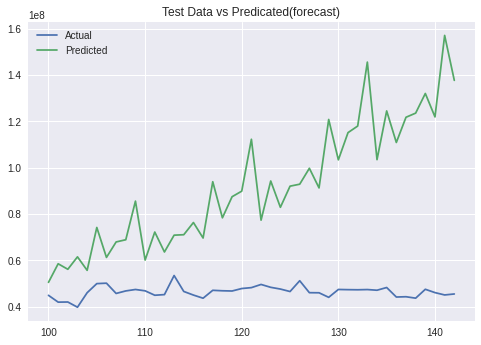

In [196]:
#PLOT FOR TEST DATA SET VS Forecast 


from matplotlib import pyplot

pyplot.plot(df2test_copy['Weekly_Sales'], label='Actual')
pyplot.plot(df2test_copy.forecast, label='Predicted')
pyplot.title('Test Data vs Predicated(forecast)')
pyplot.legend()
pyplot.show()

In [208]:
##MODEL FORECASTING WITH BEST VALUES
bestmodel = sm.tsa.statespace.SARIMAX(df2.Weekly_Sales, 
                                             order = (2,1,1),
                                             seasonal_order = (0,0,2,12),
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
bestresults = bestmodel.fit() 
futureresults = bestresults.get_forecast(steps=45,alpha=0.01).predicted_mean
df3 = df2
df3['forecast'] = futureresults


In [ ]:
print(futureresults)

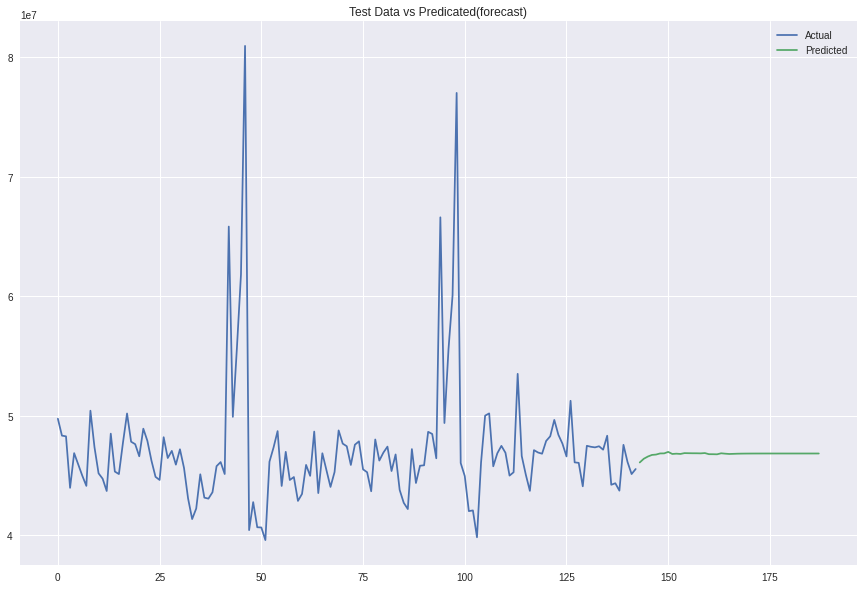

In [216]:
from matplotlib import pyplot

pyplot.plot(df3['Weekly_Sales'], label='Actual')
pyplot.plot(futureresults, label='Predicted')
pyplot.title('Test Data vs Predicated(forecast)')
pyplot.legend()
pyplot.show()
plt.rcParams["figure.figsize"] = (15,10)


##ARCHIVE

In [ ]:
import warnings
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(df2train.Weekly_Sales, # change this train
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit() 

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{} x {}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

In [ ]:
best_model = sm.tsa.statespace.SARIMAX(df2train.Weekly_Sales,
                                      order=(0, 1, 1),
                                      seasonal_order=(0, 1, 0, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [ ]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

In [ ]:
pred_dynamic = best_results.get_prediction(start='2012-01-06', dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
#df2test = df2test.set_index(df2test['Date'])
df2test

In [ ]:
ts_forecasted = pred_dynamic.predicted_mean
ts_truth = df2test['2012-01-06':]

# Compute the mean square error
mse = ((ts_forecasted - ts_truth['Weekly_Sales']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))


In [ ]:
n_steps = 43
pred_uc_99 = best_results.get_forecast(steps=43, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=43, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
n_steps = 43
idx = pd.date_range(df2test.Date.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

In [ ]:
axis = df2test['Weekly_Sales'].plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [ ]:
df2test.to_csv('/content/drive/MyDrive/df2test.csv')
df2train.to_csv('/content/drive/MyDrive/df2train.csv')